# Predicting Car Prices

In this project, we'll practice the machine learning workflow to predict a car's market price using it's attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and etc. 
<br>
<br>
You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile) and can download it directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data). 

## Data Presentation

First let's get familiar with the dataset.

In [1]:
import pandas as pd
import numpy as np

cars = pd.read_csv('imports-85.data')
cars.head(3)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950


It seems dataset was saved without header row. Let's specify columns names so they can match the names in the dataset's documentation.

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 
                'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 
                'engine-location', 'wheel-base', 'length', 'width', 
                'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 
                'engine-size', 'fuel-system', 'bore', 'stroke', 
                'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 
                'highway-mpg', 'price']

In [3]:
cars = pd.read_csv('imports-85.data', names=cols)
cars.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


Now let's determine which columns are numeric and can be used as features and which column is the target column.

In [4]:
# After using logic and just eyeballing column values we've got these cols:
numeric_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 
                'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 
                'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 
                'highway-mpg', 'price']

In [5]:
# New DF view with only numeric columns:
numeric_cars = cars[numeric_cols]
numeric_cars.head(4)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950


## Data Cleaning

We usually can't have any missing values if we want to use them for predictive modeling. Based on the data set preview from the begining, we can tell that the **normalized-losses** column contains missing values represented using "?". Let's replace these values and look for the presence of missing values in other numeric columns. <br>
<br>
Most of the times, datasets will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations, this is a problem.
Let's also rescale the values in the numeric columns so they all range from 0 to 1.

In [6]:
# First we'll replace all '?' signs with np.nan across all dataframe:
numeric_cars = numeric_cars.replace("?", np.nan)

# Second we'll transform all values to float and count nulls:
numeric_cars = numeric_cars.astype(float)
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [7]:
# Because `price` is the column we want to predict, 
# let's remove any rows with missing `price` values.
numeric_cars = numeric_cars.dropna(subset=['price'])

# We'll not drop remained missing rows,
# but we'll replace missing values with columns means:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [8]:
# Here we'll isolate target column from normalization:
price_col = numeric_cars['price']

# Normalize all columnns to range from 0 to 1 except the target column.
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

In [9]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


In [10]:
numeric_cars.shape

(201, 15)

## Univariate Model

Let's start with some univariate k-nearest neighbors models. Starting with simple models before moving to more complex models helps us structure our code workflow and understand the features better.

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [12]:
def knn_train_test(train_col, target_col, df):
    '''
    Simple 'by-hand' Nearest Neighbors model without cross-validation.
    Focus on RMSE metrics with no predictions result for now.
    
    '''
    
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[[train_col]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# For each column, except of `price`, train a model, return RMSE value
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val

# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc.
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

engine-size          3238.462830
horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

Now let's see how different K-values will influence our RMSE calculations.

In [13]:
def knn_train_test_k(train_col, target_col, df, k_list):
    '''
    Simple 'by-hand' Nearest Neighbors model without cross-validation.
    Focus on RMSE metrics with no predictions result for now.
    Added K-values list to iterate.
    
    '''
    
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = k_list
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[[train_col]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
        
    return k_rmses

k_rmse_results = {}
kv_list = [1,3,5,7,9,11]

# We use 'train_cols' from previous block, it's the same:
for col in train_cols:
    rmse_val = knn_train_test_k(col, 'price', numeric_cars, kv_list)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'normalized-losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432,
  11: 7820.285424210016},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312,
  11: 5808.9885357403355},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446,
  11: 5453.122025678248},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787,
  11: 4891.354659619978},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223,
  11: 7773.544506771428},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401,
  11: 4730.575419875025},
 'engine-size': {1: 3258.4861059962027,
  3

Let's visualize our results.

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

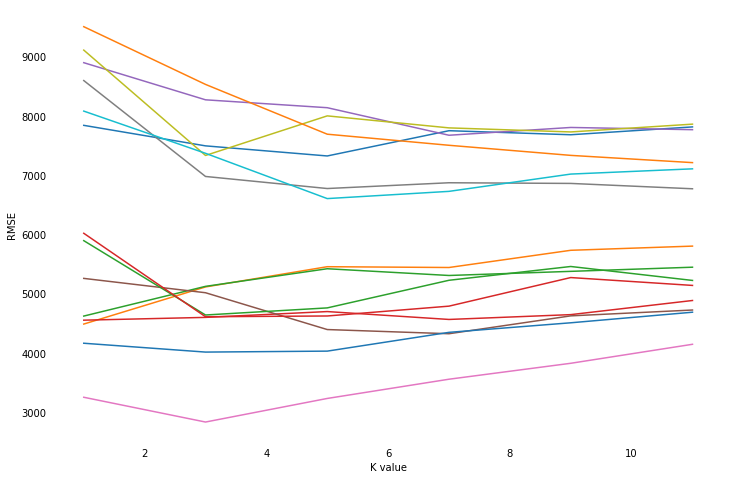

In [15]:
fig, ax = plt.subplots(figsize=(12,8))

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    ax.plot(x,y)
    ax.set_xlabel('K value')
    ax.set_ylabel('RMSE')

for key, spine in ax.spines.items():
    spine.set_visible(False)

ax.tick_params(bottom=False, top=False, left=False, right=False)

plt.show()

## Multivariate Model

Let's modify the **knn_train_test** function we wrote in the last step to work with multiple columns.

In [16]:
# Compute average RMSE across different `k` values for each feature:
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse

# Series object from dictionary for better result representation:
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

engine-size          3480.815355
horsepower           4298.441467
width                4664.317910
curb-weight          4730.159083
highway-mpg          5082.167361
city-mpg             5206.987137
length               5222.516091
wheel-base           5345.158474
bore                 7148.143396
compression-rate     7157.217233
normalized-losses    7657.053530
peak-rpm             7969.095704
stroke               7978.039534
height               8098.379306
dtype: float64

In [17]:
def knn_train_test(train_cols, target_col, df):
    '''
    Simple 'by-hand' Nearest Neighbors model without cross-validation.
    Focus on RMSE metrics with no predictions result for now.
    K-value set to 5 to test best number of features.
    
    '''
    
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results_features = {}

two_best_features = ['horsepower', 'width']
rmse_val_f = knn_train_test(two_best_features, 'price', numeric_cars)
k_rmse_results_features["two best features"] = rmse_val_f

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val_f = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results_features["three best features"] = rmse_val_f

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_va_f = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results_features["four best features"] = rmse_val_f

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val_f = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results_features["five best features"] = rmse_val_f

six_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg', 'length']
rmse_val_f = knn_train_test(six_best_features, 'price', numeric_cars)
k_rmse_results_features["six best features"] = rmse_val_f

k_rmse_results_features

{'two best features': {5: 3589.3132622073304},
 'three best features': {5: 3305.9401397969677},
 'four best features': {5: 3305.9401397969677},
 'five best features': {5: 3341.6024539726504},
 'six best features': {5: 3628.261188214127}}

## Hyperparameter Tuning

Let's now optimize the model that performed the best in the previous step.

In [18]:
from sklearn.model_selection import KFold

def knn_train_test_kf(train_cols, target_col, df):
    '''
    Simple 'by-hand' Nearest Neighbors model with cross-validation.
    Focus on RMSE metrics with no predictions result for now.
    K-value is in range from 1 to 19.
    KFold cross-validation used to split df to train and test sets.
    
    '''
    
    X = df[train_cols]
    y = df[[target_col]]
    
    k_values = [i for i in range(1, 20)]
    k_rmses = {}
    
    kf = KFold(n_splits=2, random_state=1, shuffle=True)
    for train_index, test_index, in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train[train_cols], y_train)

        # Make predictions using model.
        predicted_labels = knn.predict(X_test[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(y_test, predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results_kf = {}

# Best number of features according to previous result - 3, 4, 5:
three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val_kf = knn_train_test_kf(three_best_features, 'price', numeric_cars)
k_rmse_results_kf["three best features"] = rmse_val_kf

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val_kf = knn_train_test_kf(four_best_features, 'price', numeric_cars)
k_rmse_results_kf["four best features"] = rmse_val_kf

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val_kf = knn_train_test_kf(five_best_features, 'price', numeric_cars)
k_rmse_results_kf["five best features"] = rmse_val_kf

k_rmse_results_kf

{'three best features': {1: 3034.148569203558,
  2: 2827.2230399280493,
  3: 3183.5886023305347,
  4: 3222.707059581277,
  5: 3330.0598301532063,
  6: 3521.31000548407,
  7: 3774.5789601934007,
  8: 3990.6639592068514,
  9: 4005.6803712099013,
  10: 4082.011361681886,
  11: 4169.5021168575195,
  12: 4223.480232736912,
  13: 4326.440783486785,
  14: 4377.3944247225245,
  15: 4402.138038620174,
  16: 4411.928949184953,
  17: 4530.94089091383,
  18: 4603.655662431839,
  19: 4650.739351140179},
 'four best features': {1: 2531.022917715286,
  2: 2807.6884300078596,
  3: 3001.8127167874195,
  4: 3136.3982369311775,
  5: 3298.322922880657,
  6: 3472.3198106997256,
  7: 3788.813008538884,
  8: 4004.3764764317552,
  9: 4032.8920300357563,
  10: 4052.90573596278,
  11: 4243.756943367535,
  12: 4367.48473811173,
  13: 4479.041841317425,
  14: 4484.880022807701,
  15: 4453.269677768609,
  16: 4507.528341334049,
  17: 4618.137442436272,
  18: 4639.15801711666,
  19: 4709.25438094902},
 'five best f

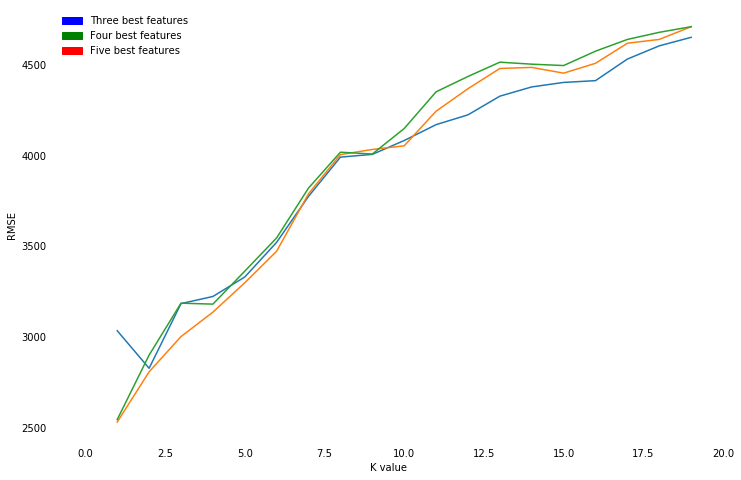

In [19]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(12,8))

for k,v in k_rmse_results_kf.items():
    x = list(v.keys())
    y = list(v.values())
    
    ax.plot(x,y)
    ax.set_xlabel('K value')
    ax.set_ylabel('RMSE')

for key, spine in ax.spines.items():
    spine.set_visible(False)

ax.tick_params(bottom=False, top=False, left=False, right=False)
ax.set_xlim(-1, 20)

red_patch = mpatches.Patch(color='blue', label='Three best features')
blue_patch = mpatches.Patch(color='red', label='Five best features')
green_patch = mpatches.Patch(color='green', label='Four best features')
ax.legend(handles=[red_patch, green_patch,  blue_patch], loc='best', frameon=False)

plt.show()

It seems for the four and five features model the best k-value is 1. Three features model best k-value is 2.

## Predictions

Finally let's see what prices our model will predict.

In [20]:
def knn_predictions(train_cols, target_col, df):
    '''
    Simple 'by-hand' Nearest Neighbors model with cross-validation.
    K-value is 1.
    KFold cross-validation used to split df to train and test sets.
    Used model predictions as a result and RMSE as metric.
    
    '''
    
    X = df[train_cols]
    y = df[[target_col]]
    
    kf = KFold(n_splits=2, random_state=11, shuffle=True)
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
      
    knn = KNeighborsRegressor(n_neighbors=1)
    knn.fit(X_train[train_cols], y_train)

    # Make predictions using model.
    predicted_labels = knn.predict(X_test[train_cols])
    mse = mean_squared_error(y_test, predicted_labels)
    rmse = np.sqrt(mse)
    
    return predicted_labels, y_test, rmse

We'll take five features to calculate error and predict prices.

In [21]:
five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
pred_labels, test_set, error = knn_predictions(five_best_features, 'price', numeric_cars)

Final counted error will be:

In [22]:
error

2795.252870493115

Last thing we'll do is see what prices we got from our model.<br>
In addition let's calculate error from resulting dataframe.

In [23]:
test_set['predictions'] = pred_labels
test_set['error'] = test_set['price'] - test_set['predictions']

test_set

,price,predictions,error
1,16500.0,13495.0,3005.0
4,17450.0,13295.0,4155.0
7,18920.0,17710.0,1210.0
8,23875.0,17710.0,6165.0
14,24565.0,16515.0,8050.0
...,...,...,...
198,18420.0,13499.0,4921.0
199,18950.0,13499.0,5451.0
200,16845.0,22625.0,-5780.0
201,19045.0,17199.0,1846.0


In [24]:
test_set['error'].abs().mean()

1959.83

## Conclusion

We succesfully trained a K-nearest neighbors model and predicted some car prices.
Finally we'va got mean RMSE 1959.83 over dataframe.